In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


In [2]:
def vectorize(data, demenison=10000):
    result = np.zeros((len(data), demenison))
    for index, element in enumerate(data):
        result[index, element] = 1
    return result

In [6]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
print(len(x_val))
print(len(partial_x_train))

10000
15000


In [137]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-09-22 17:46:58.319190: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 1s 25ms/step - loss: 0.5489 - accuracy: 0.7715 - val_loss: 0.4120 - val_accuracy: 0.8681
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3308 - accuracy: 0.9010 - val_loss: 0.3312 - val_accuracy: 0.8775
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2417 - accuracy: 0.9213 - val_loss: 0.2841 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1875 - accuracy: 0.9405 - val_loss: 0.2815 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1516 - accuracy: 0.9519 - val_loss: 0.2963 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1286 - accuracy: 0.9588 - val_loss: 0.2873 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1045 - accuracy: 0.9693 - val_loss: 0.3109 - val_accuracy: 0.8852
Epoch 8/20
30/30 [===========

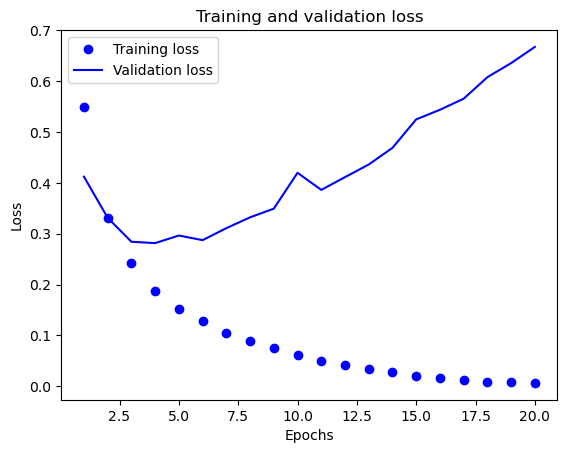

In [146]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

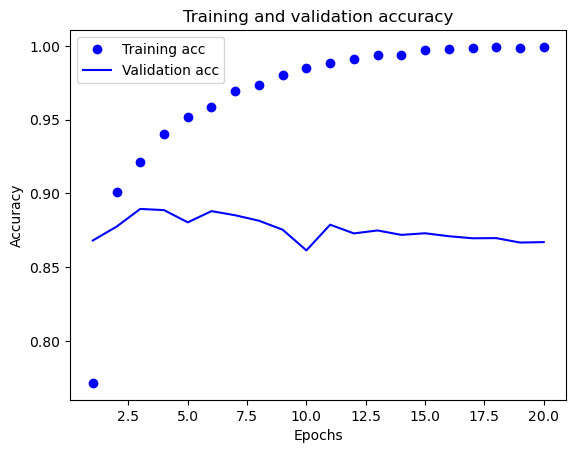

In [154]:
plt.clf()
acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

In [37]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [38]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [39]:
y_train = vectorize(train_labels, demenison=46)
y_test = vectorize(test_labels, demenison=46)

In [40]:
from keras import models
from keras import layers

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [42]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [43]:
x_val = x_train[:1000]
parial_x_train = x_train[1000:]

y_val = y_train[:1000]
parial_y_train = y_train[1000:]

In [20]:
history = model.fit(parial_x_train,
                   parial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20


2022-09-26 15:21:49.698044: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 1s 20ms/step - loss: 2.6551 - accuracy: 0.5043 - val_loss: 1.7472 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4253 - accuracy: 0.7056 - val_loss: 1.2893 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0417 - accuracy: 0.7801 - val_loss: 1.1227 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8198 - accuracy: 0.8289 - val_loss: 1.0312 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6562 - accuracy: 0.8641 - val_loss: 0.9656 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5256 - accuracy: 0.8904 - val_loss: 0.9117 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4270 - accuracy: 0.9118 - val_loss: 0.8996 - val_accuracy: 0.8030
Epoch 8/20
16/16 [======

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

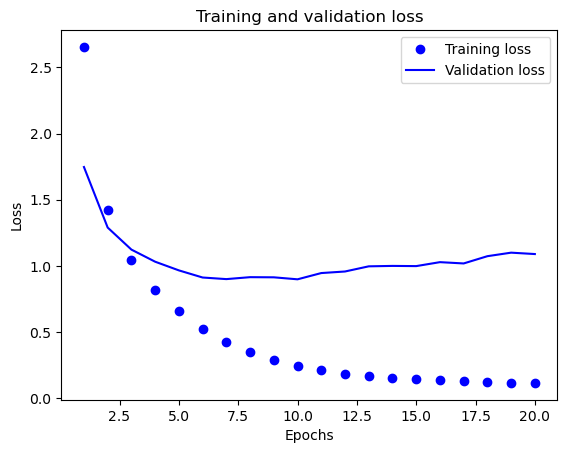

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

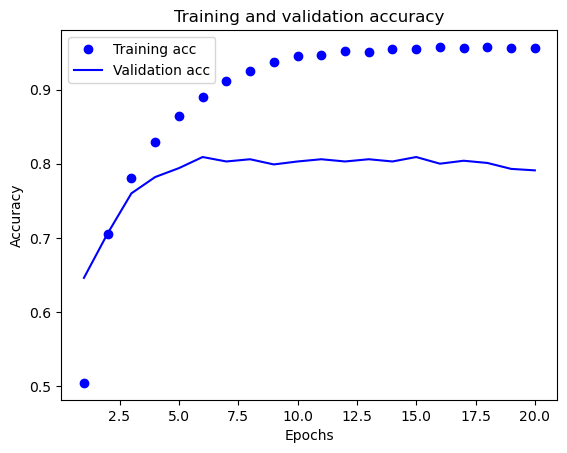

In [32]:
plt.clf() 
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
model_2 = models.Sequential()
model_2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(32, activation='relu'))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='relu'))

In [56]:
model_2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])

model_2.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
18/18 [==============================] - 0s 8ms/step - loss: 0.0216 - acc: 0.9783
Epoch 2/4
18/18 [==============================] - 0s 7ms/step - loss: 0.0213 - acc: 0.9783
Epoch 3/4
18/18 [==============================] - 0s 7ms/step - loss: 0.0213 - acc: 0.9783
Epoch 4/4
18/18 [==============================] - 0s 6ms/step - loss: 0.0213 - acc: 0.9783


In [57]:
result = model_2.evaluate(x_test, y_test)

71/71 [==============================] - 0s 587us/step - loss: 0.0213 - acc: 0.9783


In [58]:
model_2.predict(x_test)

71/71 [==============================] - 0s 567us/step


array([[0.02047197],
       [0.01732349],
       [0.01748235],
       ...,
       [0.01992593],
       [0.01864242],
       [0.01831516]], dtype=float32)

In [49]:
result

[0.10520799458026886, 0.9782605171203613]

In [54]:
result

[0.10498157888650894, 0.9782605171203613]

In [59]:
result

[0.021274659782648087, 0.9782605171203613]

0.9995351769030094